# Simulation of MDP in Andrew Ng's Lecture 16 - Success rate of optimal policy

<div align="center"><img src="../img/Simulation of MDP in Andrew Ng's Lecture 16 - Success rate of optimal policy.png" width="60%"></div>

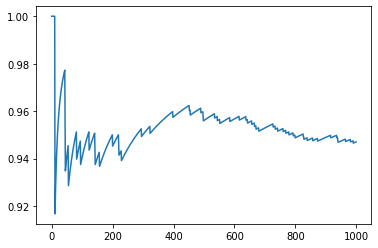

Success rate: 0.947


In [13]:
# Simulation of MDP in Andrew Ng's Lecture 16 - Success rate of optimal policy

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_states = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
n_actions = len(actions)

# transition probabilities
P = np.empty((n_states, n_actions, n_states))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((n_states, n_actions, n_states)) 
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1
    
# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0: 
    # random policy
    policy = 0.25*np.ones((n_states, n_actions))
elif 0: 
    # optimal policy 
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((n_states, n_actions))
    policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

# MDP simulation
simulation_history = []
for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  
    
    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])

        if s1 == 3:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append(1.)
        elif s1 == 6:
            # if game is over, 
            # ready to break while loop by letting done = True
            # append end result to simulation_history 
            done = True
            simulation_history.append(0.)
        else:
            # if game is not over, continue playing game
            s = s1

history = np.cumsum(simulation_history) / (np.arange(epoch) + 1)
plt.plot(history)
plt.show()

print("Success rate: {}".format(history[-1]))